# Strength of a Carbon Nanotube

In this simulation, you pull in a carbon nanotube (CNT) to measure its strength.

The simulation may be done in two ways, one where you allow the atoms to move towards the minimum energy configuration, and one where the atoms are forces to remain in their initial positions (apart from an affine transformation).

The first method (allowing so-called atomic relaxations) is more realistic, but also more time consuming.

First, we need to import the Python modules needed to run the simulation

In [1]:
%matplotlib notebook
from numpy import *
from ase.build import nanotube
from ase.visualize import view
from ase.optimize import FIRE, MDMin
from asap3 import BrennerPotential
#from asap3 import OpenKIMcalculator
import nglview
import matplotlib.pyplot as plt

### Parameters of the simulation

Here we specify what we want to do.

In [2]:
# Type and length of the CNT
cnt_n = 5
cnt_m = 5
cnt_length = 10

# Simulation parameters
max_strain = 0.6   # We pull up to 60% ...
step_strain = 0.002 # ... in steps of 0.02%

# Do we allow atomic relaxations?  (and what are the parameters)
allow_relax = True
mdmin_steps = 100
fmax = 0.05

### Setting up the system

We create a CNT.

**IMPORTANT:** If you repeat the simulation below several times, please start by recreating the nanotube so you do not start a simulation with a nanotube that has already been damaged.

In [3]:
atoms = nanotube(cnt_n, cnt_m, length=cnt_length, bond=1.420, symbol='C')
atoms.center(axis=(0,1), vacuum=10.0)

And choose how the chemical bonds are described mathematically.

In [5]:
atoms.set_calculator(BrennerPotential())

### Run the simulation

First, we save the initial lenght of the nanotube.  All deformation is measured relative to this lenght.

In [6]:
cell = atoms.get_cell()
startlength = cell[2,2]
print('Initial length of the nanotube:', startlength, 'Å')

Initial length of the nanotube: 24.595121467478055 Å


Below, we create a list of strains (relative deformations) in the variable *strains*.  The function *arange* generate a list from a starting value to an ending value (not included) with a given step.

Then the *for* loop loops over these strains.  For each strain, the length of the nanotube is changed and the atoms are then (optionally) allowed to move to minimize the energy (done by the energy minimization module *MDMin*).  Finally, the resulting energy is saved in a list of *energies* (for data analysis and plotting) and the atomic configuration is saved for visualization.

In [7]:
configurations = []  # An empty list of snapshots
energies = []
strains = arange(0, max_strain, step_strain)
for strain in strains:
    cell[2,2] = startlength * (1 + strain)  # Specify a new length ...
    atoms.set_cell(cell, scale_atoms=True)  # ... and force it upon the atoms.
    # Do the atomic relaxations, if desired
    if allow_relax:
        # This takes time - print progress
        if len(energies) % 25 == 0:
            print("Progress: strain =", strain)
        minimizer = MDMin(atoms, dt=0.01, logfile='/dev/null')
        minimizer.run(fmax=fmax, steps=mdmin_steps)
    # Calculate the energy
    e = atoms.get_potential_energy()
    # Store the atomic configuration and the energy for later visualization
    configurations.append(atoms.copy())  # Take a copy of the atoms
    energies.append(e)
energies = array(energies)  # A "numeric array" is easier to work with later.
print("Simulation done!")

Progress: strain = 0.0
Progress: strain = 0.05
Progress: strain = 0.1
Progress: strain = 0.15
Progress: strain = 0.2
Progress: strain = 0.25
Progress: strain = 0.3
Progress: strain = 0.35000000000000003
Progress: strain = 0.4
Progress: strain = 0.45
Progress: strain = 0.5
Progress: strain = 0.55
Simulation done!


### View the results

You can see a movie of the simulation below.

In [8]:
v = nglview.show_asetraj(configurations)
v

A Jupyter Widget

A simple plot of the energy versus strain.

<IPython.core.display.Javascript object>


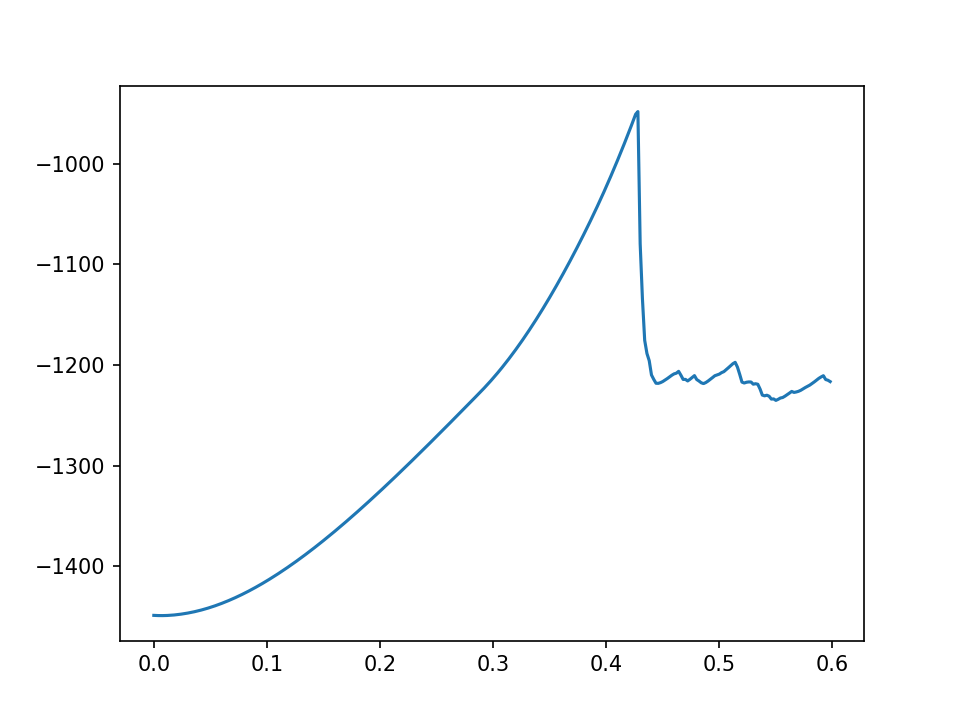

In [9]:
plt.figure()
plt.plot(strains, energies)
plt.show()

You may want to make the plot above nicer and add text along the axes.  Get inspiration from the notebook EnergyOfNanotube, where a nicer plot is shown in the bottom of the notebook.  Also, you may want other quantities along the axes, i.e. length instead of strain and/or force instead of energy.